# FORECASTING

In [1]:
#See the yahoo finance ticker for your stock symbol

#stock_symbol = '^GSPC'
stock_symbol = '^VIX'

#stock_symbol = 'CL=F'
#stock_symbol = 'NG=F'

#stock_symbol = 'GC=F'
#stock_symbol = 'SI=F'
#stock_symbol = 'HG=F'

#stock_symbol = 'EURUSD=X'
#stock_symbol = 'EURCHF=X'

Object_study = 'VIX'

# WITH LSTM 30-30-20-10 WITH 50 EPOCHS

In [2]:
#Installing dependencies to read and plot real time financial markets webdata

In [3]:
#pip install yfinance

In [4]:
#pip install plotly==5.3.1

In [5]:
#import plotly.graph_objs as go
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from plotly.graph_objs import graph_objs
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [6]:
data = yf.download(tickers=stock_symbol, period='5y', interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-23,12.300000,12.620000,11.590000,11.770000,11.770000,0
2017-01-24,11.820000,11.890000,11.040000,11.070000,11.070000,0
2017-01-25,10.790000,11.050000,10.510000,10.810000,10.810000,0
2017-01-26,10.610000,11.010000,10.600000,10.630000,10.630000,0
2017-01-27,10.570000,10.820000,10.300000,10.580000,10.580000,0
...,...,...,...,...,...,...
2022-01-14,20.110001,22.070000,19.049999,19.190001,19.190001,0
2022-01-18,21.180000,23.200001,21.180000,22.790001,22.790001,0
2022-01-19,23.120001,23.990000,21.850000,23.850000,23.850000,0


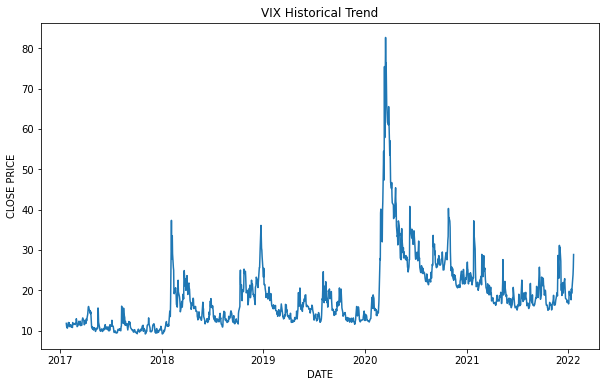

In [7]:
plt.title("{0} Historical Trend".format(Object_study))
plt.xlabel("DATE")
plt.ylabel("CLOSE PRICE")
plt.plot(data['Close'])

In [8]:
import keras

In [9]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [10]:
data1 = data.filter(['Close'])
data1

,Close
Date,
2017-01-23,11.770000
2017-01-24,11.070000
2017-01-25,10.810000
2017-01-26,10.630000
2017-01-27,10.580000
...,...
2022-01-14,19.190001
2022-01-18,22.790001
2022-01-19,23.850000


<AxesSubplot:xlabel='Date'>

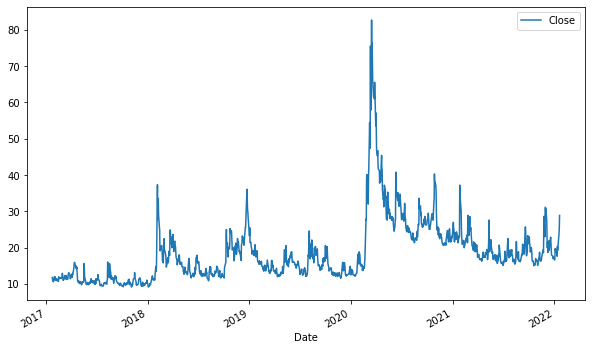

In [11]:
data1.plot()

In [12]:
data2=data1.reset_index()['Close']

In [13]:
data2

0       11.770000
1       11.070000
2       10.810000
3       10.630000
4       10.580000
          ...    
1255    19.190001
1256    22.790001
1257    23.850000
1258    25.590000
1259    28.850000
Name: Close, Length: 1260, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data3=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [15]:
print(data3)

[[0.03575799]
 [0.02624064]
 [0.02270564]
 ...
 [0.19999999]
 [0.22365737]
 [0.26798096]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(data3)*0.65)
test_size=len(data3)-training_size
train_data,test_data=data3[0:training_size,:],data3[training_size:len(data3),:1]

In [17]:
training_size,test_size

(819, 441)

In [18]:
train_data

array([[3.57579883e-02],
       [2.62406431e-02],
       [2.27056428e-02],
       [2.02583240e-02],
       [1.95785118e-02],
       [3.72535648e-02],
       [3.87491414e-02],
       [3.63018355e-02],
       [3.79333771e-02],
       [2.48810316e-02],
       [3.03195034e-02],
       [2.92318091e-02],
       [3.14071978e-02],
       [2.36573721e-02],
       [2.32494900e-02],
       [2.62406431e-02],
       [2.17539005e-02],
       [3.84772242e-02],
       [3.56220233e-02],
       [3.19510450e-02],
       [3.30387394e-02],
       [3.53500932e-02],
       [3.49422110e-02],
       [3.16791279e-02],
       [4.01087658e-02],
       [5.13936047e-02],
       [4.62270499e-02],
       [3.63018355e-02],
       [2.47450665e-02],
       [2.85519968e-02],
       [3.14071978e-02],
       [3.69816347e-02],
       [4.29639668e-02],
       [3.42623988e-02],
       [3.00475863e-02],
       [4.29639668e-02],
       [3.38545167e-02],
       [2.81441147e-02],
       [2.90958440e-02],
       [2.99116213e-02],


In [19]:
test_data

array([[0.364242  ],
       [0.32834806],
       [0.33215498],
       [0.30033989],
       [0.34004079],
       [0.38137318],
       [0.36478586],
       [0.33269884],
       [0.33963287],
       [0.3031951 ],
       [0.25615226],
       [0.25057782],
       [0.32494901],
       [0.35540446],
       [0.31910265],
       [0.30931337],
       [0.27409923],
       [0.29082257],
       [0.25628822],
       [0.27722637],
       [0.25859958],
       [0.25656015],
       [0.25125765],
       [0.26444594],
       [0.24976206],
       [0.25955131],
       [0.24065261],
       [0.2246091 ],
       [0.22664852],
       [0.20910944],
       [0.22664852],
       [0.25057782],
       [0.25057782],
       [0.43031951],
       [0.36641739],
       [0.34343984],
       [0.33351458],
       [0.33079538],
       [0.32358936],
       [0.35322907],
       [0.30768184],
       [0.30224337],
       [0.33582596],
       [0.31380014],
       [0.34792656],
       [0.30781781],
       [0.28946294],
       [0.264

In [20]:
test_data.shape

(441, 1)

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(718, 100)
(718,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
#import tensorflow as tf

In [27]:
#tf.version

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(30,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(30,return_sequences=True))
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 418ms/step - loss: 0.0142 - val_loss: 0.0022
Epoch 2/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 4/100
12/12 [==============================] - 2s 133ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 5/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0046 - val_loss: 0.0021
Epoch 6/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 8/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 10/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0030 - val_l

12/12 [==============================] - 2s 132ms/step - loss: 9.7348e-04 - val_loss: 0.0011
Epoch 82/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 83/100
12/12 [==============================] - 2s 133ms/step - loss: 8.4609e-04 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 2s 130ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 86/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 88/100
12/12 [==============================] - 2s 133ms/step - loss: 9.9297e-04 - val_loss: 0.0011
Epoch 89/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 90/100
12/12 [==============================] - 2s 130ms/step - loss: 9.2012e

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

19.55394260857787

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

21.966830276177124

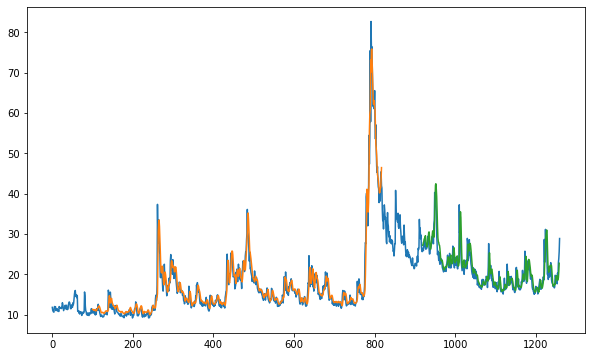

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data3)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
test_data

array([[0.364242  ],
       [0.32834806],
       [0.33215498],
       [0.30033989],
       [0.34004079],
       [0.38137318],
       [0.36478586],
       [0.33269884],
       [0.33963287],
       [0.3031951 ],
       [0.25615226],
       [0.25057782],
       [0.32494901],
       [0.35540446],
       [0.31910265],
       [0.30931337],
       [0.27409923],
       [0.29082257],
       [0.25628822],
       [0.27722637],
       [0.25859958],
       [0.25656015],
       [0.25125765],
       [0.26444594],
       [0.24976206],
       [0.25955131],
       [0.24065261],
       [0.2246091 ],
       [0.22664852],
       [0.20910944],
       [0.22664852],
       [0.25057782],
       [0.25057782],
       [0.43031951],
       [0.36641739],
       [0.34343984],
       [0.33351458],
       [0.33079538],
       [0.32358936],
       [0.35322907],
       [0.30768184],
       [0.30224337],
       [0.33582596],
       [0.31380014],
       [0.34792656],
       [0.30781781],
       [0.28946294],
       [0.264

In [37]:
len(test_data)

441

In [38]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
#temp_input

In [41]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.25166467]
101
1 day input [0.09476547 0.09884431 0.09884431 0.12236572 0.1199184  0.13133921
 0.16057104 0.13908906 0.14031269 0.12290958 0.12984364 0.15866756
 0.2252889  0.20693406 0.15948335 0.12902785 0.11706321 0.13079537
 0.19184227 0.18246089 0.19034668 0.16261046 0.18789937 0.16532969
 0.16125084 0.14140041 0.13093134 0.14765465 0.14561522 0.12916382
 0.10496261 0.09734872 0.09748469 0.08919102 0.08633582 0.07980965
 0.08552005 0.08293677 0.09299795 0.10659414 0.10047587 0.09680489
 0.09884431 0.09367777 0.08103331 0.085656   0.09979604 0.10985722
 0.11747111 0.13038748 0.11583955 0.09721279 0.09993201 0.09830048
 0.10836166 0.11488783 0.1192386  0.13636981 0.139225   0.12834805
 0.26485384 0.18789937 0.24541128 0.29884432 0.25574439 0.29272602
 0.24527532 0.17335144 0.14629502 0.16913663 0.12984364 0.15186946
 0.17335144 0.13800136 0.15540447 0.16900067 0.18667573 0.16138681
 0.12902785 0.1199184  0.11611148 0.11420803 0.10618627 0.11135281
 0.10985722 0.1014276  0.10564241

10 day input [0.12290958 0.12984364 0.15866756 0.2252889  0.20693406 0.15948335
 0.12902785 0.11706321 0.13079537 0.19184227 0.18246089 0.19034668
 0.16261046 0.18789937 0.16532969 0.16125084 0.14140041 0.13093134
 0.14765465 0.14561522 0.12916382 0.10496261 0.09734872 0.09748469
 0.08919102 0.08633582 0.07980965 0.08552005 0.08293677 0.09299795
 0.10659414 0.10047587 0.09680489 0.09884431 0.09367777 0.08103331
 0.085656   0.09979604 0.10985722 0.11747111 0.13038748 0.11583955
 0.09721279 0.09993201 0.09830048 0.10836166 0.11488783 0.1192386
 0.13636981 0.139225   0.12834805 0.26485384 0.18789937 0.24541128
 0.29884432 0.25574439 0.29272602 0.24527532 0.17335144 0.14629502
 0.16913663 0.12984364 0.15186946 0.17335144 0.13800136 0.15540447
 0.16900067 0.18667573 0.16138681 0.12902785 0.1199184  0.11611148
 0.11420803 0.10618627 0.11135281 0.10985722 0.1014276  0.10564241
 0.14398367 0.14235214 0.13079537 0.13949693 0.1260367  0.11529572
 0.15186946 0.13664174 0.18558804 0.19999999 0.223

18 day output [[0.78519297]]
19 day input [0.19184227 0.18246089 0.19034668 0.16261046 0.18789937 0.16532969
 0.16125084 0.14140041 0.13093134 0.14765465 0.14561522 0.12916382
 0.10496261 0.09734872 0.09748469 0.08919102 0.08633582 0.07980965
 0.08552005 0.08293677 0.09299795 0.10659414 0.10047587 0.09680489
 0.09884431 0.09367777 0.08103331 0.085656   0.09979604 0.10985722
 0.11747111 0.13038748 0.11583955 0.09721279 0.09993201 0.09830048
 0.10836166 0.11488783 0.1192386  0.13636981 0.139225   0.12834805
 0.26485384 0.18789937 0.24541128 0.29884432 0.25574439 0.29272602
 0.24527532 0.17335144 0.14629502 0.16913663 0.12984364 0.15186946
 0.17335144 0.13800136 0.15540447 0.16900067 0.18667573 0.16138681
 0.12902785 0.1199184  0.11611148 0.11420803 0.10618627 0.11135281
 0.10985722 0.1014276  0.10564241 0.14398367 0.14235214 0.13079537
 0.13949693 0.1260367  0.11529572 0.15186946 0.13664174 0.18558804
 0.19999999 0.22365737 0.26798096 0.25166467 0.27179861 0.28242174
 0.29089847 0.300567

28 day output [[0.64009297]]
29 day input [0.14561522 0.12916382 0.10496261 0.09734872 0.09748469 0.08919102
 0.08633582 0.07980965 0.08552005 0.08293677 0.09299795 0.10659414
 0.10047587 0.09680489 0.09884431 0.09367777 0.08103331 0.085656
 0.09979604 0.10985722 0.11747111 0.13038748 0.11583955 0.09721279
 0.09993201 0.09830048 0.10836166 0.11488783 0.1192386  0.13636981
 0.139225   0.12834805 0.26485384 0.18789937 0.24541128 0.29884432
 0.25574439 0.29272602 0.24527532 0.17335144 0.14629502 0.16913663
 0.12984364 0.15186946 0.17335144 0.13800136 0.15540447 0.16900067
 0.18667573 0.16138681 0.12902785 0.1199184  0.11611148 0.11420803
 0.10618627 0.11135281 0.10985722 0.1014276  0.10564241 0.14398367
 0.14235214 0.13079537 0.13949693 0.1260367  0.11529572 0.15186946
 0.13664174 0.18558804 0.19999999 0.22365737 0.26798096 0.25166467
 0.27179861 0.28242174 0.29089847 0.3005676  0.31306559 0.32948056
 0.35054851 0.37667021 0.4079788  0.44442949 0.4858427  0.53183651
 0.58159328 0.63344741

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
len(data3)

1260

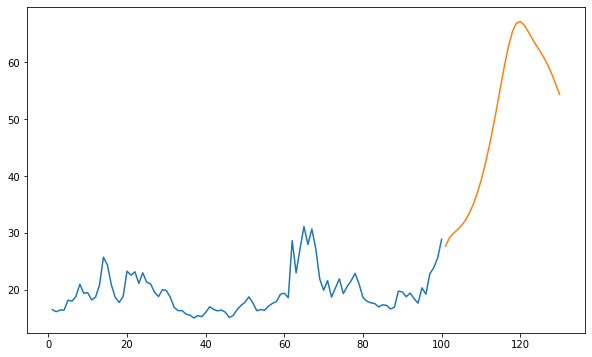

In [44]:
plt.plot(day_new,scaler.inverse_transform(data3[1160:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [45]:
data3

array([[0.03575799],
       [0.02624064],
       [0.02270564],
       ...,
       [0.19999999],
       [0.22365737],
       [0.26798096]])

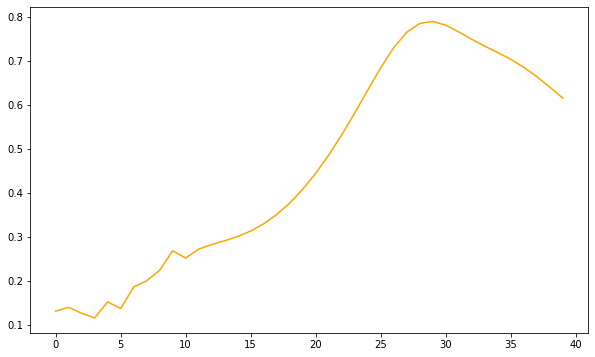

In [46]:
data4=data3.tolist()
data4.extend(lst_output)
plt.plot(data4[1250:],color='orange')

In [47]:
data5=scaler.inverse_transform(data4)

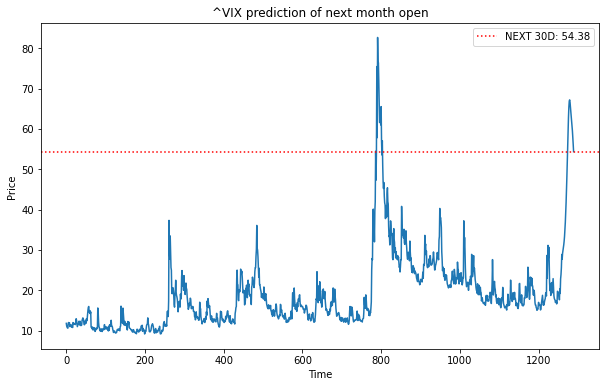

In [48]:
#Plotting final results with predicted value after 30 Days
plt.plot(data5,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=data5[len(data5)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*data5[len(data5)-1]),2)))
plt.legend()

In [49]:
#plt.plot(futureforecast4[1:],color='orange')

In [50]:
#float_lst = list(np.array(df4, dtype = 'float'))
    
#print(float_lst)

In [51]:
import numpy as np

lst = data5

float_lst = list(np.float_(lst))
    
print(float_lst)

[array([11.77000046]), array([11.06999969]), array([10.81000042]), array([10.63000011]), array([10.57999992]), array([11.88000011]), array([11.98999977]), array([11.81000042]), array([11.93000031]), array([10.97000027]), array([11.36999989]), array([11.28999996]), array([11.44999981]), array([10.88000011]), array([10.85000038]), array([11.06999969]), array([10.73999977]), array([11.97000027]), array([11.76000023]), array([11.48999977]), array([11.56999969]), array([11.73999977]), array([11.71000004]), array([11.47000027]), array([12.09000015]), array([12.92000008]), array([12.53999996]), array([11.81000042]), array([10.96000004]), array([11.23999977]), array([11.44999981]), array([11.85999966]), array([12.30000019]), array([11.65999985]), array([11.35000038]), array([12.30000019]), array([11.63000011]), array([11.21000004]), array([11.27999973]), array([11.34000015]), array([12.47000027]), array([12.81000042]), array([13.11999989]), array([12.96000004]), array([12.5]), array([11.529999

In [52]:
data6=float_lst

In [53]:
data7 = np.array(data6)
data7

array([[11.77000046],
       [11.06999969],
       [10.81000042],
       ...,
       [57.97710782],
       [56.21883955],
       [54.38053403]])

In [54]:
#futureforecast = futureforecast.astype(float)

In [55]:
data8 = pd.DataFrame(data7)
data8

,0
0,11.770000
1,11.070000
2,10.810000
3,10.630000
4,10.580000
...,...
1285,60.874117
1286,59.546517
1287,57.977108
1288,56.218840


In [56]:
date = pd.DataFrame()
date['Date'] = pd.date_range('26/06/2018', periods = 1290, freq ='d')
#1290= len data (1260) + prediction days (30)
date

,Date
0,2018-06-26
1,2018-06-27
2,2018-06-28
3,2018-06-29
4,2018-06-30
...,...
1285,2022-01-01
1286,2022-01-02
1287,2022-01-03
1288,2022-01-04


In [57]:
data9 = pd.concat([date,data8],axis=1)

In [58]:
data9

,Date,0
0,2018-06-26,11.770000
1,2018-06-27,11.070000
2,2018-06-28,10.810000
3,2018-06-29,10.630000
4,2018-06-30,10.580000
...,...,...
1285,2022-01-01,60.874117
1286,2022-01-02,59.546517
1287,2022-01-03,57.977108
1288,2022-01-04,56.218840


In [59]:
#Clean the dataset and rename columns for visual representations
data9.set_index(data9["Date"], inplace=True)


In [60]:
data9

,Date,0
Date,,
2018-06-26,2018-06-26,11.770000
2018-06-27,2018-06-27,11.070000
2018-06-28,2018-06-28,10.810000
2018-06-29,2018-06-29,10.630000
2018-06-30,2018-06-30,10.580000
...,...,...
2022-01-01,2022-01-01,60.874117
2022-01-02,2022-01-02,59.546517
2022-01-03,2022-01-03,57.977108


In [61]:
data10=data9.drop(['Date'], axis=1)
data10.columns=['Forecasted_Close']


In [62]:
data10

,Forecasted_Close
Date,
2018-06-26,11.770000
2018-06-27,11.070000
2018-06-28,10.810000
2018-06-29,10.630000
2018-06-30,10.580000
...,...
2022-01-01,60.874117
2022-01-02,59.546517
2022-01-03,57.977108


In [63]:
data10.describe()

,Forecasted_Close
count,1290.000000
mean,19.244842
std,10.095366
min,9.140000
25%,12.682500
50%,16.485000
75%,22.020000
max,82.690002


In [64]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1290 entries, 2018-06-26 to 2022-01-05
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Forecasted_Close  1290 non-null   float64
dtypes: float64(1)
memory usage: 20.2 KB


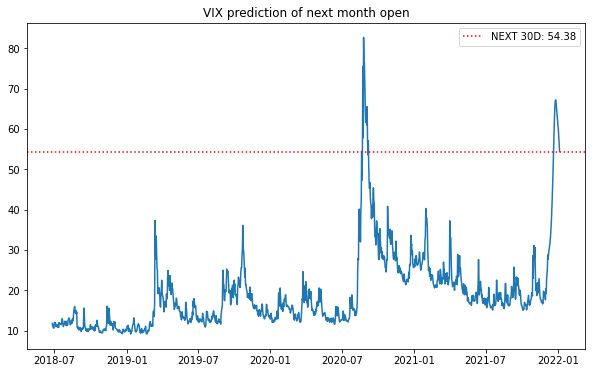

In [65]:
plt.title("{0} prediction of next month open".format(Object_study))
plt.plot(data10)
plt.axhline(y=data5[len(data5)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*data5[len(data5)-1]),2)))

plt.legend()

In [66]:
data10.tail(1)

,Forecasted_Close
Date,
2022-01-05,54.380534
